# `Project: Problem Statement - Personal Loan Campaign Modelling-2 `

##  `Thera Bank Personal Loan Campaign `
 
##  `Data Description: `
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 

##  `Domain: `

##  `Banking `

 

##  `Context: `
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

##   `Attribute Information: `
* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (\\$000)
* ZIP Code: Home Address ZIP
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month (\\$000)
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. ($000)
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

## `Learning Outcomes: `
Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation

## `Objective: `
The classification goal is to predict the likelihood of a liability customer buying personal loans.

## `Steps and tasks: `
* Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
* EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
* Number of unique in each column?
* Number of people with zero mortgage?
* Number of people with zero credit card spending per month?
* Value counts of all categorical columns.
* Univariate and Bivariate
* Get data model ready
* Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
* Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics * related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
* Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the * rows where the predicted class is not equal to the observed class. (10 marks)
* Give conclusion related to the Business understanding of your model? (5 marks)

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## `Steps and tasks 1:`
* Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

* Import the datasets & view first 5 rows

In [3]:
dataset = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Observation

### Categorical Feature:

- None


### Numerical feature:
    
- ID
- Age
- Experience
- Income
- Zip Code
- Family
- CCAvg
- Education
- Mortage
- Personal Loan
- Securities Account
- CD Account
- Online
- Credit Card

#### Step & Task
* check datatype & null values

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Observation

- No Missing Values/ no null values
- Total 5000 record in dataset

In [6]:
# Check if any missing value
dataset.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [7]:
dataset.isnull().apply(pd.value_counts)   #null value check

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


#### Observation
- no null values

#### Step & Task
* statistical summary, shape,  incorrect imputation.

In [8]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Observation

- Column 'Experience' has negative values

In [10]:
any(dataset['Experience'] < 0)

True

In [11]:
dataset[dataset['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [12]:
dataset['Experience'][dataset['Experience'] < 0].count()

52

In [13]:
dataset['Experience'].isnull().sum()

0

In [14]:
# Experience can't have negative values hence replacing it with median
dataset[dataset['Experience'] == -1]['Experience'].count()

33

In [15]:
# Experience can't have negative values hence replacing it with median
dataset[dataset['Experience'] == -2]['Experience'].count()

15

In [16]:
# Experience can't have negative values hence replacing it with median
dataset[dataset['Experience'] == -3]['Experience'].count()

4

In [17]:
# Experience can't have negative values hence replacing it with median
dataset[dataset['Experience'] == -4]['Experience'].count()

0

### Total 52 negative values in Experience.

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

### Replacing the negative values with the mean value of the column

In [18]:
exp_med = dataset.loc[:,"Experience"].median()
dataset.loc[:, 'Experience'].replace([-1, -2, -3], [exp_med, exp_med, exp_med], inplace=True)

In [19]:
any(dataset['Experience'] < 0)

False

In [20]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## `Steps and tasks: `

* EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
* Number of unique in each column?
* Number of people with zero mortgage?
* Number of people with zero credit card spending per month?
* Value counts of all categorical columns.
* Univariate and Bivariate

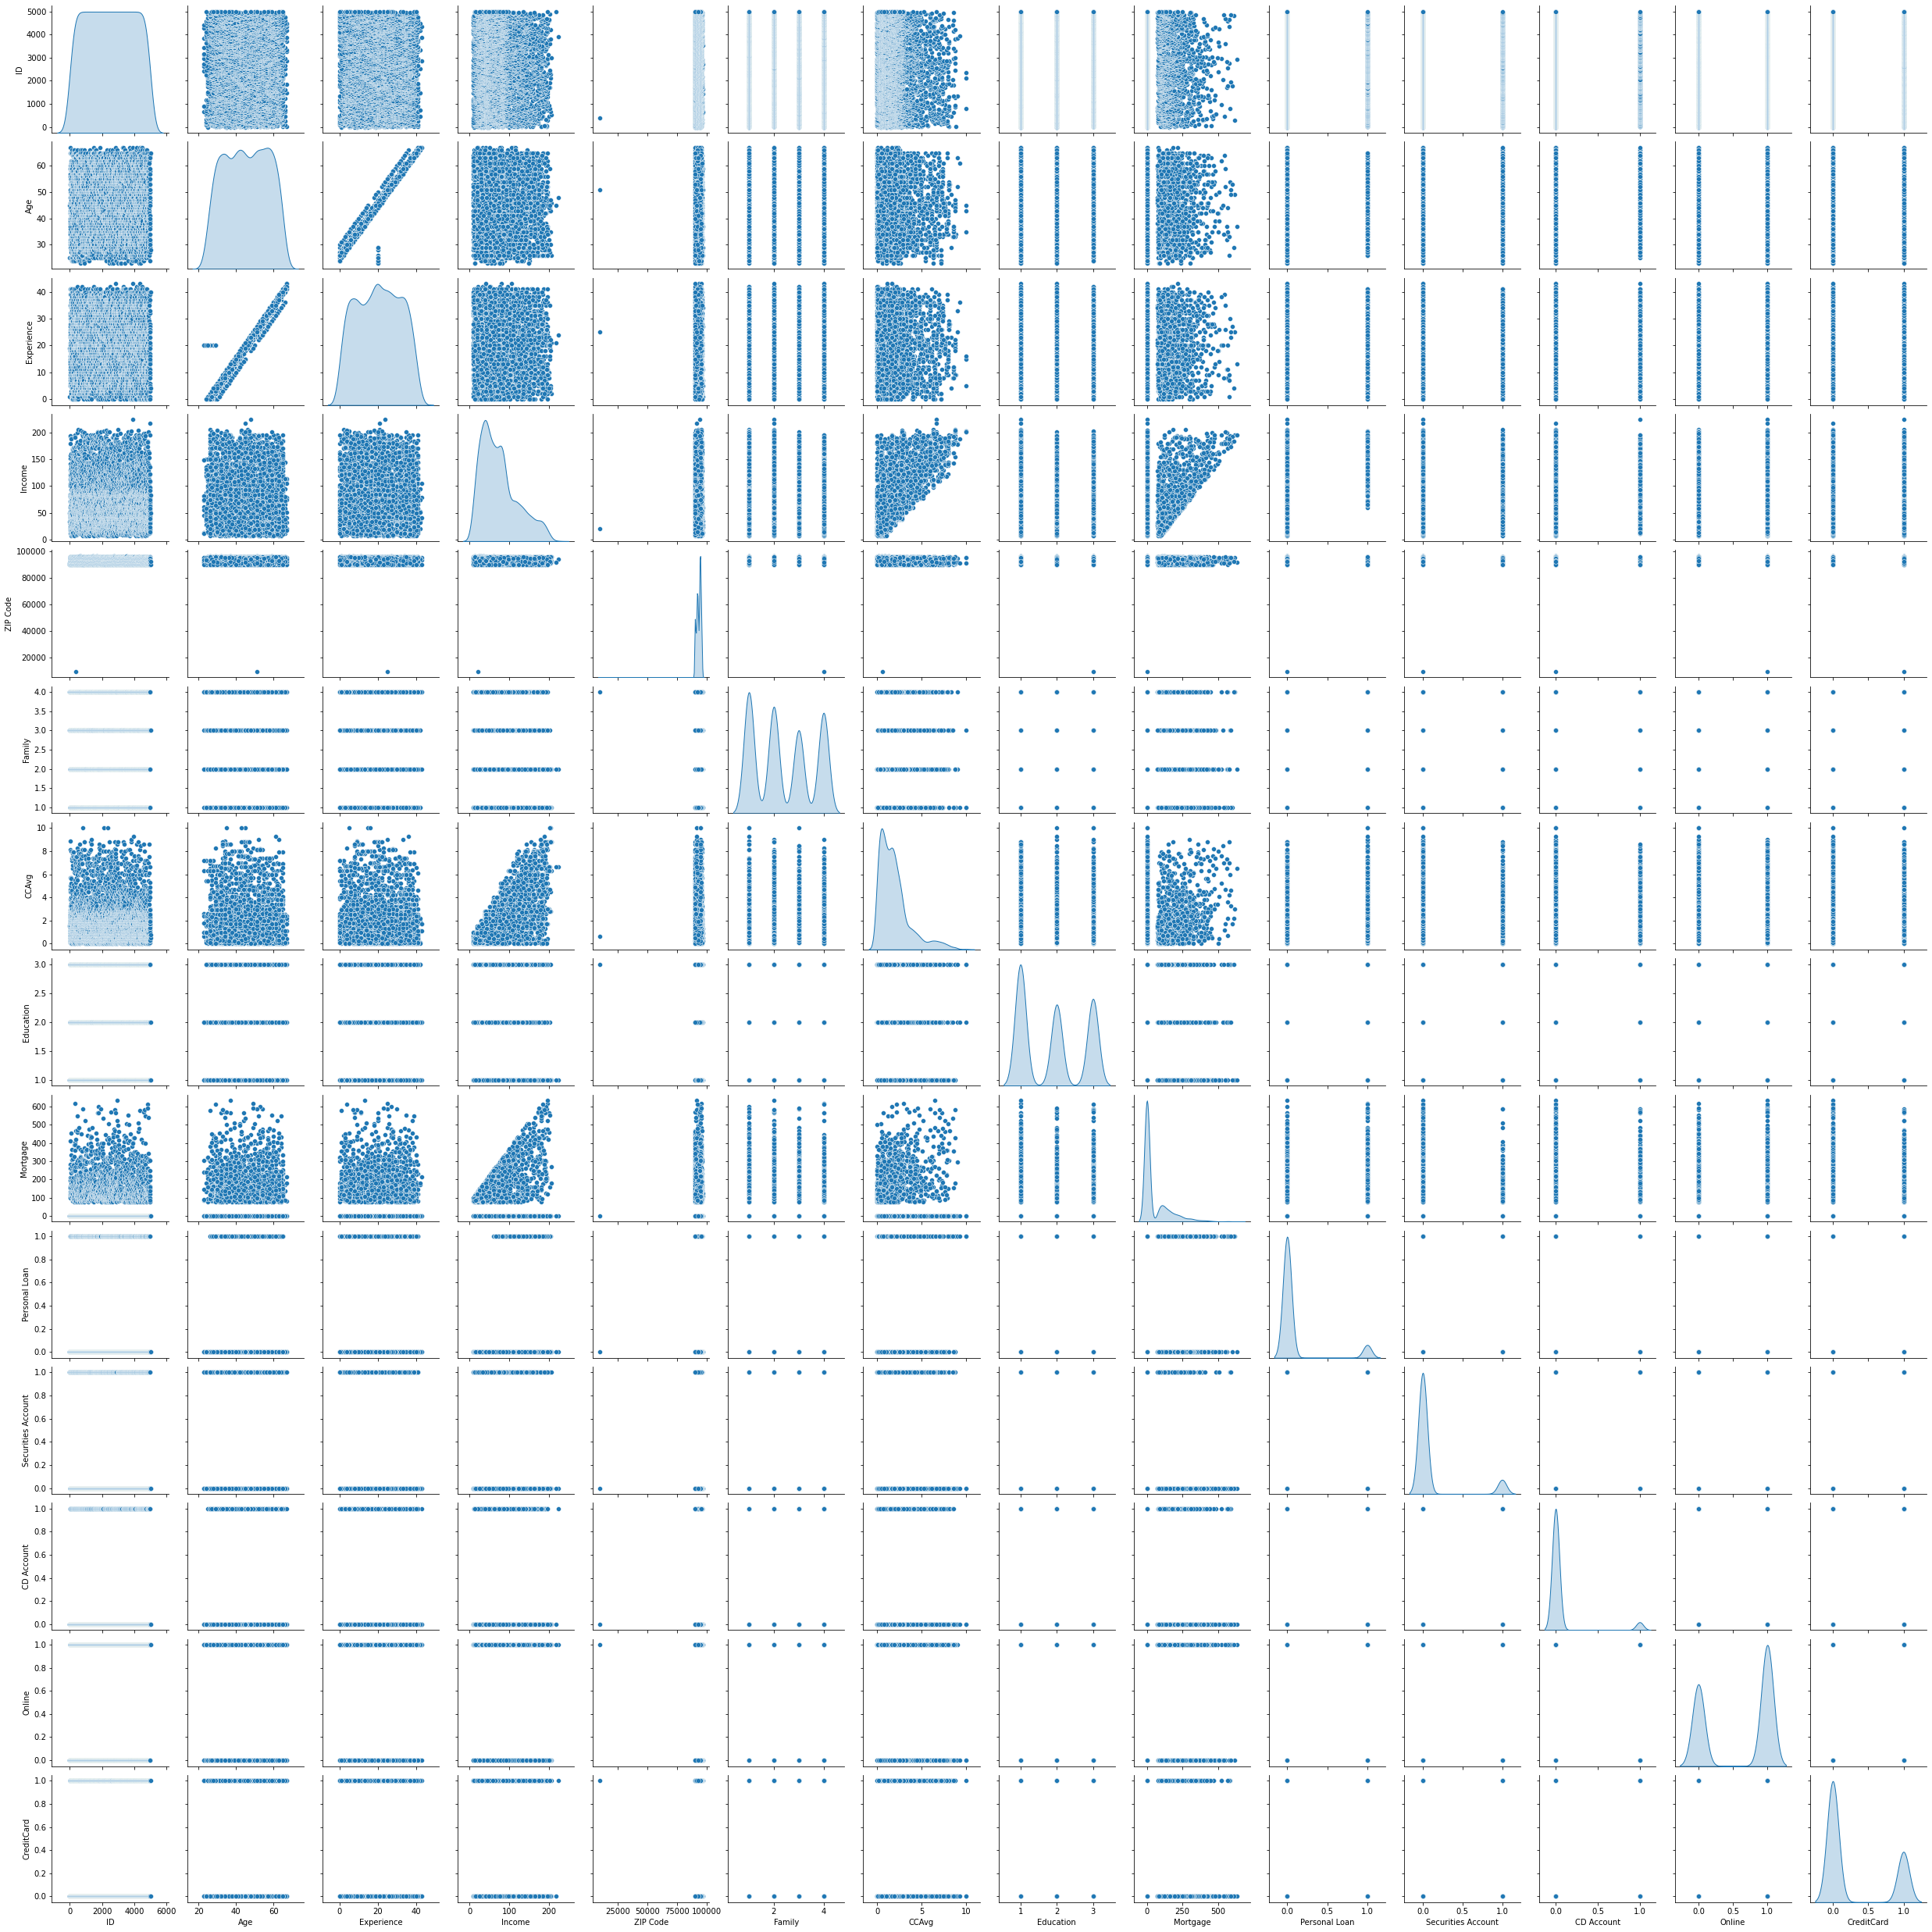

In [21]:
sns.pairplot(data =dataset,diag_kind ='kde')

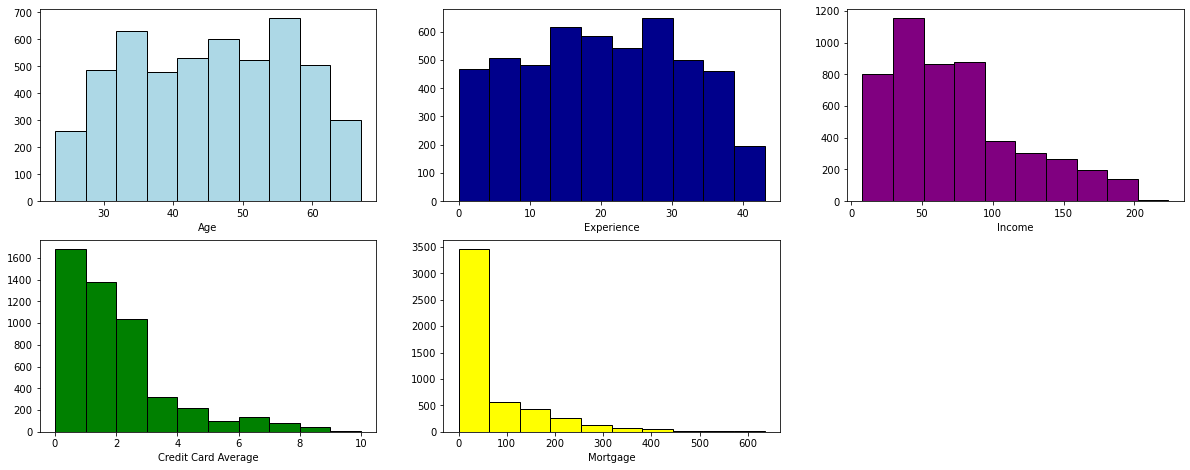

In [22]:
plt.figure(figsize= (20.5,20.5))
plt.subplot(5,3,1)
plt.hist(dataset.Age, color='lightblue', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(dataset.Experience, color='darkblue', edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,3,3)
plt.hist(dataset.Income, color='purple', edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,3,4)
plt.hist(dataset.CCAvg, color='green', edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(5,3,5)
plt.hist(dataset.Mortgage, color='yellow', edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()

## Observation

- Age & Experience seems to be quiet normally distributed

- Income, CC Average & Mortgage are highly skewed

<AxesSubplot:xlabel='Mortgage'>

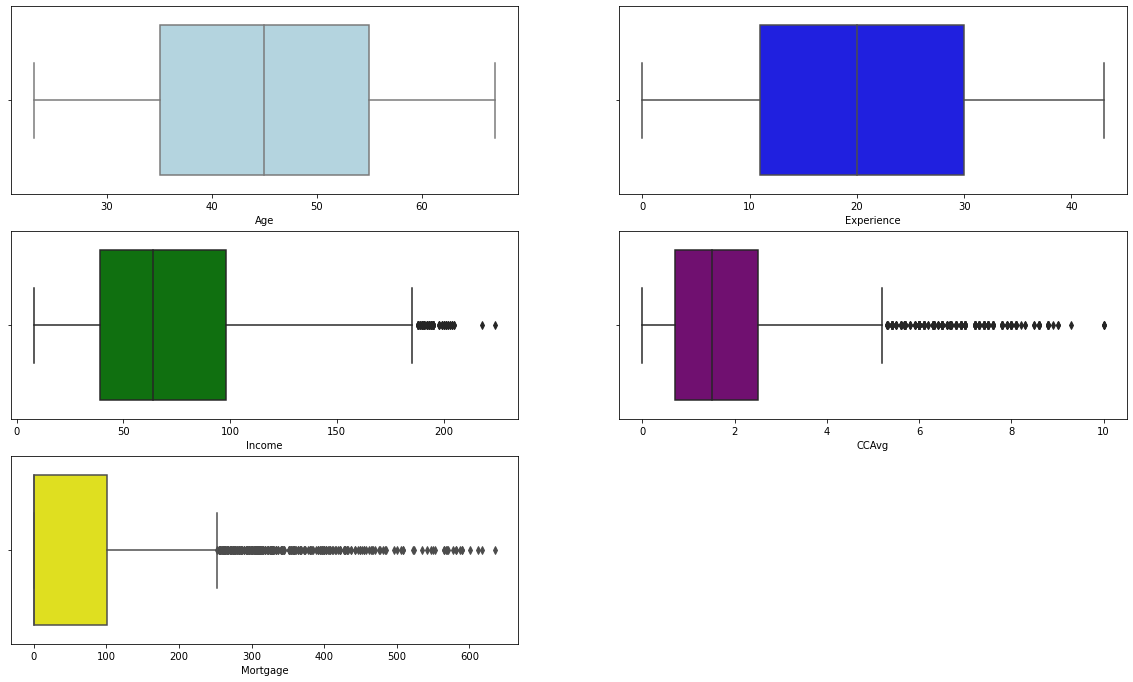

In [23]:
plt.figure(figsize= (20,20))
plt.subplot(5,2,1)
sns.boxplot(x= dataset.Age, color='lightblue')

plt.subplot(5,2,2)
sns.boxplot(x= dataset.Experience, color='blue')

plt.subplot(5,2,3)
sns.boxplot(x= dataset.Income, color='green')

plt.subplot(5,2,4)
sns.boxplot(x= dataset.CCAvg, color='purple')

plt.subplot(5,2,5)
sns.boxplot(x= dataset.Mortgage, color='yellow')

### Observation

1. Age feature is normally distributed with majority of customers falling between 35 years and 55 years of age. We can infer from the boxplot above, and also in info attained from describe() shows mean is almost equal to median.

2. Experience is normally distributed with more customer having experience starting from 11 years to 30 Years. Here also the mean is equal to median.

3. Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.

4. CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.

5. Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.

Text(0.5, 1.0, 'Credit Card Distribution')

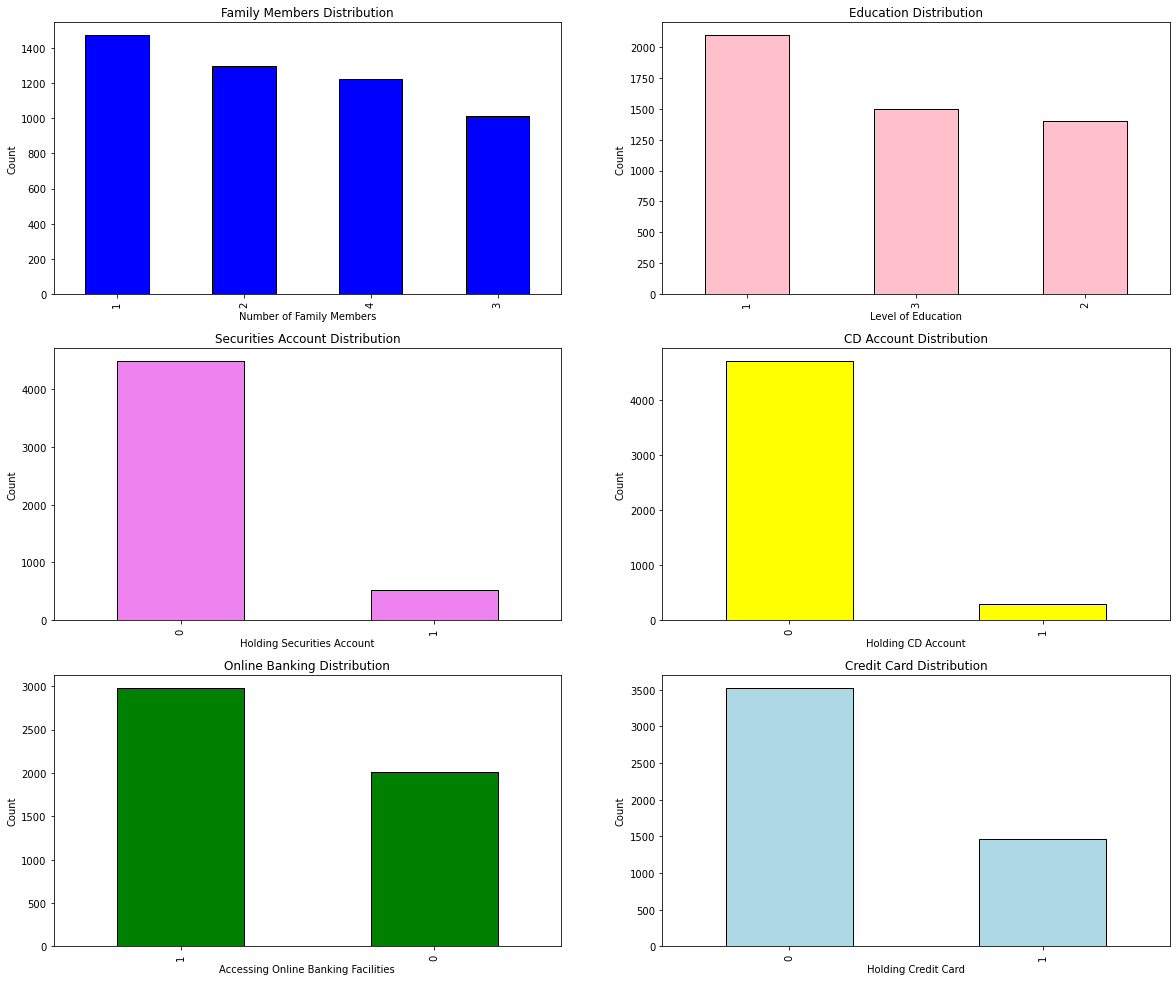

In [24]:
plt.figure(figsize=(20,35))


plt.subplot(6,2,1)
dataset['Family'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.title("Family Members Distribution")


plt.subplot(6,2,2)
dataset['Education'].value_counts().plot(kind="bar", align='center',color = 'pink',edgecolor = 'black')
plt.xlabel('Level of Education')
plt.ylabel('Count ')
plt.title('Education Distribution')


plt.subplot(6,2,3)
dataset['Securities Account'].value_counts().plot(kind="bar", align='center',color = 'violet',edgecolor = 'black')
plt.xlabel('Holding Securities Account')
plt.ylabel('Count')
plt.title('Securities Account Distribution')


plt.subplot(6,2,4)
dataset['CD Account'].value_counts().plot(kind="bar", align='center',color = 'yellow',edgecolor = 'black')
plt.xlabel('Holding CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")


plt.subplot(6,2,5)
dataset['Online'].value_counts().plot(kind="bar", align='center',color = 'green',edgecolor = 'black')
plt.xlabel('Accessing Online Banking Facilities')
plt.ylabel('Count')
plt.title("Online Banking Distribution")


plt.subplot(6,2,6)
dataset['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution")



#### Observations

- The variables family and education are ordinal variables. The distribution of families is evenly distributed
- It seems that many of the population is not holding Securities Account and CD Account, vast difference is visible

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

## `Steps and tasks: `
* Number of unique in each column?
* Number of people with zero mortgage?
* Number of people with zero credit card spending per month?
* Value counts of all categorical columns.
* Univariate and Bivariate

In [25]:
dataset["Personal Loan"].value_counts().to_frame()

,Personal Loan
0,4520
1,480


<AxesSubplot:>

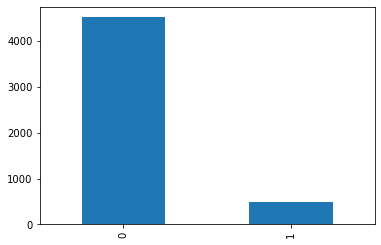

In [26]:
pd.value_counts(dataset["Personal Loan"]).plot(kind="bar")

<AxesSubplot:xlabel='Income', ylabel='Mortgage'>

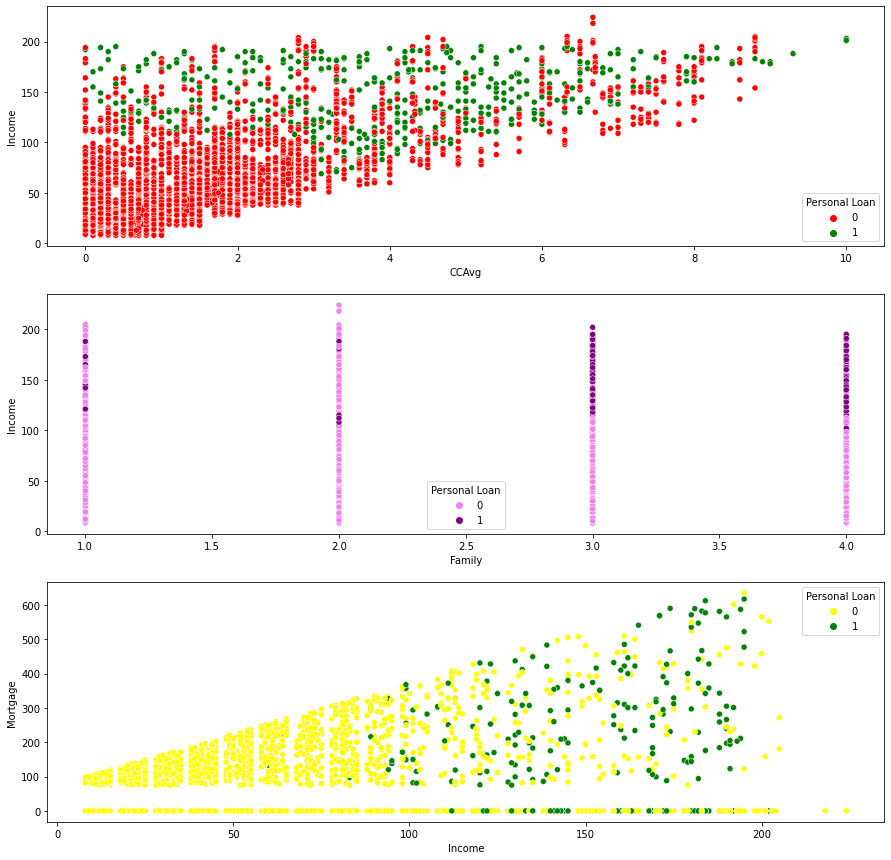

In [27]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(dataset.CCAvg, dataset.Income, hue = dataset['Personal Loan'], palette= ['red','green'])

plt.subplot(3,1,2)
sns.scatterplot(dataset.Family, dataset.Income, hue = dataset['Personal Loan'], palette= ['violet','purple'])

plt.subplot(3,1,3)
sns.scatterplot(dataset.Income, dataset.Mortgage, hue = dataset['Personal Loan'], palette= ['yellow','green'])

#### Observation  


- The graph show persons who have personal loan have a higher credit card average. 

- It is clearly visible that as the members of family increases (say >=3) the necessity of loan is also increasing.

- It is very precise that as the income increases (approx 100K) the mortgage value also increases gradually wiht the necessity of personal loan.

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

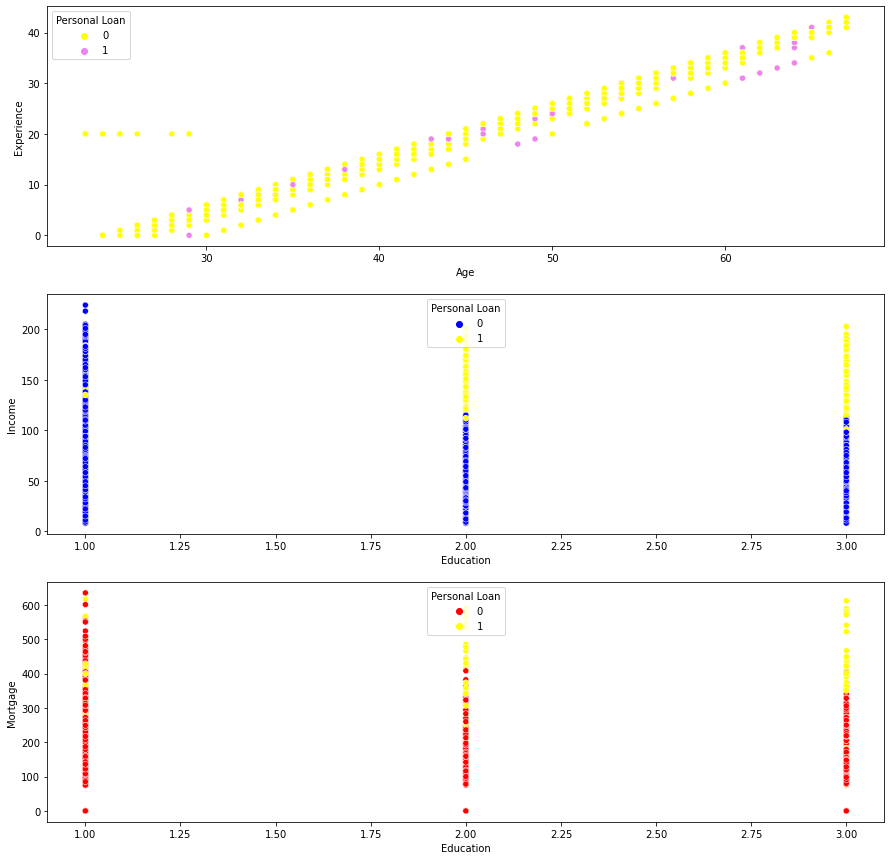

In [28]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(dataset.Age, dataset.Experience, hue = dataset['Personal Loan'], palette= ['yellow','violet'])

plt.subplot(3,1,2)
sns.scatterplot(dataset.Education, dataset.Income, hue = dataset['Personal Loan'], palette= ['blue','yellow'])

plt.subplot(3,1,3)
sns.scatterplot(dataset.Education, dataset.Mortgage, hue = dataset['Personal Loan'], palette= ['red','yellow'])

#### Observation  

- 'Age' has a very strong association with 'Experience' but nothing gets affected with loan  attribute.
- It seems that customers with education level is 1 is having more income which is mere equal to the customers who has taken the personal loan.
- Customers with education level 2 & 3 seems to take personal loan as they have high mortgage.

<AxesSubplot:xlabel='CD Account', ylabel='count'>

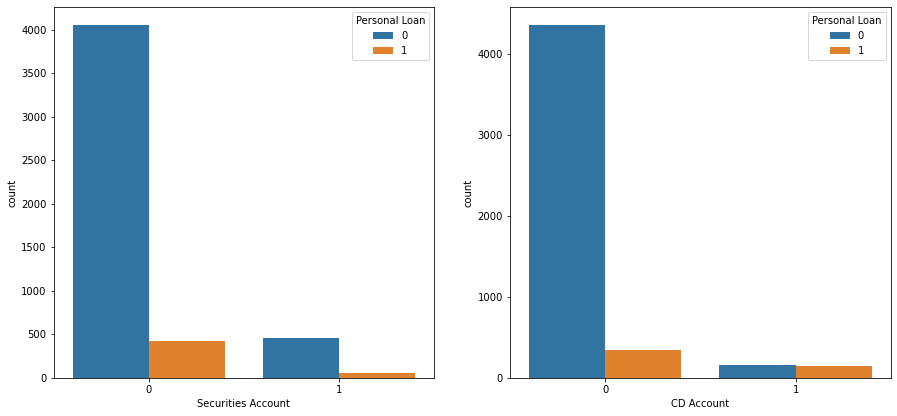

In [29]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x="Securities Account", data=dataset ,hue="Personal Loan")

plt.subplot(2,2,2)
sns.countplot(x='CD Account' ,data=dataset ,hue='Personal Loan')

#### Observation  


- Majority of customers who does not have loan is holding securities account, Whereas small proportion of customers having loan does hold but majority of them do not have securities account.
- Customers who does not have CD account, does not have loan as well, but almost all customers who has CD account has loan as well.

<AxesSubplot:xlabel='Income', ylabel='Density'>

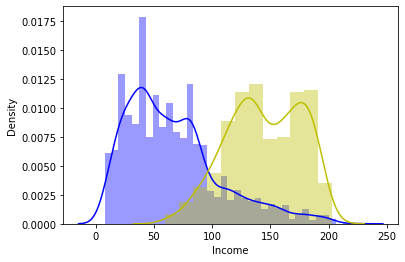

In [30]:
sns.distplot(dataset[dataset["Personal Loan"] == 0]['Income'], color = 'b')
sns.distplot(dataset[dataset["Personal Loan"] == 1]['Income'], color = 'y')

#### Observation
- The graph show those who have personal loan also have a higher income. 

In [31]:
dataset[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

,Personal Loan,Age,Income,CCAvg,Mortgage
Personal Loan,1.000000,-0.007726,0.502462,0.366889,0.142095
Age,-0.007726,1.000000,-0.055269,-0.052012,-0.012539
Income,0.502462,-0.055269,1.000000,0.645984,0.206806
CCAvg,0.366889,-0.052012,0.645984,1.000000,0.109905
Mortgage,0.142095,-0.012539,0.206806,0.109905,1.000000


<AxesSubplot:>

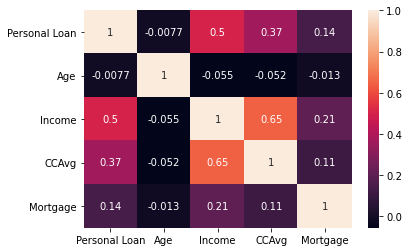

In [32]:
sns.heatmap(dataset[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr(), annot = True)

<AxesSubplot:>

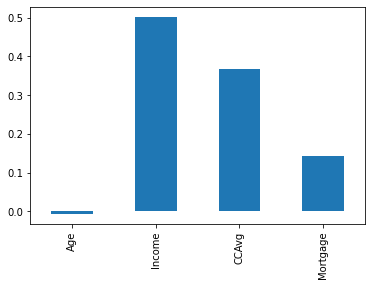

In [33]:
dataset[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()['Personal Loan'][1:].plot.bar()

#### Observation
The above diagram shows a clear vision on the correlation between the independant variable and dependant variables, we see that 'Income' and 'Credit Card Average' has some correlation with 'Personal Loan'.

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

## `Steps and tasks: `
* Get data model ready
* Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
* Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics * related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
* Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the * rows where the predicted class is not equal to the observed class. (10 marks)
* Give conclusion related to the Business understanding of your model? (5 marks)

## Basic Logistic Model

In [34]:
array = dataset
X= array.iloc[:,0:11]
y= array.iloc[:,11]

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [36]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(X)
standardized_X

array([[-1.73170443, -1.77441684, -1.71771726, ..., -0.55552393,
        -0.32587527,  2.92891517],
       [-1.73101161, -0.02952359, -0.11798886, ..., -0.55552393,
        -0.32587527,  2.92891517],
       [-1.73031879, -0.55299157, -0.47348406, ..., -0.55552393,
        -0.32587527, -0.34142334],
       ...,
       [ 1.73031879,  1.54088033,  1.65948715, ..., -0.55552393,
        -0.32587527, -0.34142334],
       [ 1.73101161,  1.71536965,  1.74836095, ..., -0.55552393,
        -0.32587527, -0.34142334],
       [ 1.73170443, -1.51268285, -1.45109586, ..., -0.55552393,
        -0.32587527, -0.34142334]])

In [37]:
#normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [40]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [41]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

<b><u>Predicting the test set results and calculating the accuracy</u></b>

In [42]:
y_pred = logreg.predict(x_test)

In [43]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(x_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.94


In [44]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


#### Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1417    0]
 [  83    0]]


In [47]:
from sklearn.metrics import classification_report
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1417
           1       0.00      0.00      0.00        83

    accuracy                           0.94      1500
   macro avg       0.47      0.50      0.49      1500
weighted avg       0.89      0.94      0.92      1500



### ROC Curve

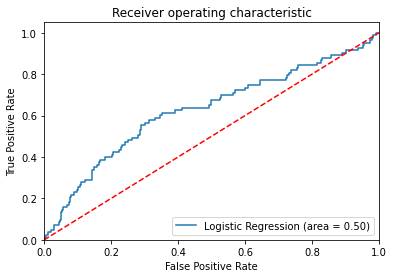

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [49]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.162182
         Iterations 8
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.289      
Dependent Variable: CD Account       AIC:              1643.8199  
Date:               2021-03-11 07:31 BIC:              1715.5090  
No. Observations:   5000             Log-Likelihood:   -810.91    
Df Model:           10               LL-Null:          -1140.3    
Df Residuals:       4989             LLR p-value:      4.2582e-135
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
ID                  0.0000   0.0000  0.4296 0.6675 -0.0001  0.0001
Age                -0.0038   0.0285 -0.1323 0.8947 -0